<a href="https://colab.research.google.com/github/Andreylive/Fashion-MNIST-classification/blob/main/Inclass_competition_MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импортируем необходимые пакеты

In [14]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

import keras
from keras.models import Sequential
from keras.layers import Dense

print(tf.__version__)

2.4.1


In [13]:
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
print(keras.__version__)

2.4.3


# Загрузим и подготовим датасет

In [4]:
train_raw = pd.read_csv('/content/fmnist_train.csv', sep=",")
test_raw = pd.read_csv('/content/fmnist_test.csv', sep=',')

In [5]:
train_raw.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,220.0,214.0,74.0,0.0,255.0,222.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,12.0,0.0,0.0,40.0,134.0,162.0,191.0,214.0,163.0,146.0,165.0,79.0,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2


In [6]:
train_raw.isnull().sum() 

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Id          0
Length: 786, dtype: int64

In [7]:
train_raw.fillna(0, inplace=True)

In [8]:
train = train_raw.drop(['Id'], axis=1)

In [9]:
X = train.drop(['label'], axis=1)
y = train.label

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

dfvkjsdlkvjl

dfvksdjlvkj

# Метод 1. K-ближайших соседей

In [16]:
knc = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knc = knc.fit(x_train, y_train)
y_pred = knc.predict(x_valid)

In [17]:
clf_rep = classification_report(y_valid, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       501
           1       0.99      0.94      0.96       503
           2       0.74      0.71      0.72       525
           3       0.89      0.83      0.86       556
           4       0.68      0.76      0.72       467
           5       0.99      0.77      0.86       546
           6       0.56      0.50      0.53       510
           7       0.83      0.95      0.88       536
           8       0.97      0.92      0.94       495
           9       0.87      0.95      0.91       473

    accuracy                           0.82      5112
   macro avg       0.82      0.82      0.82      5112
weighted avg       0.83      0.82      0.82      5112



# Метод 2. Метод опорных векторов

In [18]:
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred = svc.predict(x_valid)

In [19]:
clf_rep = classification_report(y_valid, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       501
           1       0.99      0.93      0.96       503
           2       0.80      0.80      0.80       525
           3       0.87      0.89      0.88       556
           4       0.74      0.81      0.77       467
           5       0.96      0.93      0.95       546
           6       0.67      0.57      0.62       510
           7       0.91      0.93      0.92       536
           8       0.93      0.97      0.95       495
           9       0.93      0.93      0.93       473

    accuracy                           0.86      5112
   macro avg       0.86      0.86      0.86      5112
weighted avg       0.86      0.86      0.86      5112



# Decision Tree

In [20]:
clf = DecisionTreeClassifier(max_depth=30, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [21]:
clf_rep = classification_report(y_valid, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       501
           1       0.91      0.92      0.91       503
           2       0.61      0.64      0.62       525
           3       0.79      0.77      0.78       556
           4       0.60      0.63      0.62       467
           5       0.88      0.87      0.88       546
           6       0.50      0.46      0.48       510
           7       0.85      0.84      0.85       536
           8       0.88      0.86      0.87       495
           9       0.84      0.87      0.86       473

    accuracy                           0.76      5112
   macro avg       0.76      0.76      0.76      5112
weighted avg       0.76      0.76      0.76      5112



In [ ]:
accuracy_score(test_labels, predictions) # находим Accuracy score

# Random Forest

In [22]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=30)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [23]:
clf_rep = classification_report(y_valid, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       501
           1       0.99      0.93      0.96       503
           2       0.75      0.78      0.77       525
           3       0.87      0.89      0.88       556
           4       0.71      0.78      0.74       467
           5       0.97      0.95      0.96       546
           6       0.66      0.53      0.58       510
           7       0.91      0.92      0.91       536
           8       0.95      0.96      0.95       495
           9       0.92      0.93      0.92       473

    accuracy                           0.86      5112
   macro avg       0.85      0.85      0.85      5112
weighted avg       0.85      0.86      0.85      5112



# Бустинг

In [25]:
clf = GradientBoostingClassifier(random_state=42, learning_rate = 0.01, n_estimators = 10) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [ ]:
clf_rep = classification_report(y_valid, y_pred)
print(clf_rep)

# Нейронная сетью - MLPClassifier

In [ ]:
clf = MLPClassifier(max_iter=1000, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)

In [ ]:
clf_rep = classification_report(y_valid, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       501
           1       0.97      0.94      0.95       503
           2       0.66      0.76      0.71       525
           3       0.83      0.86      0.85       556
           4       0.57      0.83      0.68       467
           5       0.95      0.90      0.92       546
           6       0.65      0.36      0.46       510
           7       0.87      0.95      0.91       536
           8       0.97      0.92      0.95       495
           9       0.93      0.89      0.91       473

    accuracy                           0.82      5112
   macro avg       0.82      0.82      0.81      5112
weighted avg       0.82      0.82      0.81      5112



# Нейронная сеть с TensorFlow

In [27]:
print(x_train.shape)
print(y_train.shape)
print(y_valid.shape)
print(x_valid.shape)

(5266, 784)
(5266,)
(2257,)
(2257, 784)


In [101]:
K.clear_session()  # очищает граф и перезапускает сессию

# Модель без скрытых слоев

In [185]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 1ms/step - loss: 1.1688 - accuracy: 0.5928
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8088
Epoch 3/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.8409
Epoch 4/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8506
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8514
Epoch 6/100
165/165 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8624
Epoch 7/100
165/165 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8770
Epoch 8/100
165/165 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8789
Epoch 9/100
165/165 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8928
Epoch 10/100
165/165 [==============================] - 0s 1ms/step - loss: 0.3234 - accura

In [186]:
model.evaluate(x_valid, y_valid)

71/71 [==============================] - 0s 1ms/step - loss: 0.8764 - accuracy: 0.8192


[0.8763905763626099, 0.8192290663719177]

In [51]:
y_predicted = model.predict(x_valid)
y_predicted[0]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1.], dtype=float32)

# Модель со скрытыми слоями

In [193]:
clear_session()

In [194]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],))) # первый скрытый слой
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],))) # первый скрытый слой
model.add(Dense(64, activation='relu',)) # выходной слой
model.add(Dense(10, activation='softmax',)) # выходной слой

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
                    x_train, 
                    y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_valid, y_valid)
                    )

Epoch 1/100
165/165 [==============================] - 1s 6ms/step - loss: 0.9003 - accuracy: 0.6920 - val_loss: 0.5615 - val_accuracy: 0.8033
Epoch 2/100
165/165 [==============================] - 1s 5ms/step - loss: 0.4112 - accuracy: 0.8423 - val_loss: 0.4775 - val_accuracy: 0.8356
Epoch 3/100
165/165 [==============================] - 1s 5ms/step - loss: 0.3108 - accuracy: 0.8867 - val_loss: 0.4328 - val_accuracy: 0.8463
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 0.2696 - accuracy: 0.8979 - val_loss: 0.5211 - val_accuracy: 0.8303
Epoch 5/100
165/165 [==============================] - 1s 5ms/step - loss: 0.2553 - accuracy: 0.9093 - val_loss: 0.5245 - val_accuracy: 0.8365
Epoch 6/100
165/165 [==============================] - 1s 5ms/step - loss: 0.2153 - accuracy: 0.9194 - val_loss: 0.5000 - val_accuracy: 0.8356
Epoch 7/100
165/165 [==============================] - 1s 5ms/step - loss: 0.1605 - accuracy: 0.9399 - val_loss: 0.5008 - val_accuracy: 0.8507

In [195]:
model.evaluate(x_valid, y_valid)

71/71 [==============================] - 0s 2ms/step - loss: 1.6204 - accuracy: 0.8631


[1.6203906536102295, 0.8630926012992859]

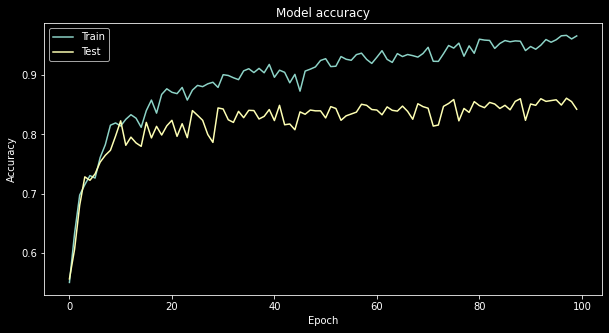

In [96]:
# Plot training & validation accuracy values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Метод 3. Метод опорных векторов